<a href="https://colab.research.google.com/github/Jindum-N/My-Data-Science-Journey/blob/main/Product_Delay_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analysis of the Cause of Product Delivery Delay**

### **Case Scenario**
#### “We’ve been receiving a lot of complaints about delayed deliveries recently, and I’m worried it’s hurting customer satisfaction.
#### Can you look into the data and tell us what’s going on?”

#### **Task:**
#### 1. Frame the Business Question as a Data Problem and determine what question(s) to to answer using the data:
#### 2. Determine what data needed for the analysis:
#### mention 3–5 types of data or fields you'd want to analyze.
#### 3. What Analysis Would You Do?:
#### Mention what kind of analysis or visuals you'd apply (e.g., average delivery time by region, % of late deliveries per product).
#### 4. What Would You Present Back?:
#### Summarize how you’d tell the story to a non-technical manager.
 #### What are your insights?
#### What action would you recommend?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel(r"C:\Users\User\OneDrive\Documents\online_retail_delivery_data.xlsx")
df.head()

,Order_ID,Order_Date,Promised_Delivery_Date,Delivery_Date,Region,Product_Category,Courier,Customer_Complained
0,ORD1000,2025-02-21,2025-02-24,2025-02-26,West,Clothing,QuickMove,0
1,ORD1001,2025-01-15,2025-01-20,2025-01-20,West,Electronics,FastTrack,0
2,ORD1002,2025-03-13,2025-03-18,2025-03-23,West,Clothing,QuickMove,1
3,ORD1003,2025-03-02,2025-03-05,2025-03-04,North,Clothing,FastTrack,0
4,ORD1004,2025-01-21,2025-01-26,2025-01-30,South-West,Toys,SpeedyShip,0


In [ ]:
df.isna().sum()

Order_ID                  0
Order_Date                0
Promised_Delivery_Date    0
Delivery_Date             0
Region                    0
Product_Category          0
Courier                   0
Customer_Complained       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order_ID                300 non-null    object        
 1   Order_Date              300 non-null    datetime64[ns]
 2   Promised_Delivery_Date  300 non-null    datetime64[ns]
 3   Delivery_Date           300 non-null    datetime64[ns]
 4   Region                  300 non-null    object        
 5   Product_Category        300 non-null    object        
 6   Courier                 300 non-null    object        
 7   Customer_Complained     300 non-null    int64         
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 18.9+ KB


#### **Question 1: Frame the Business Question as a Data Problem**
#### Business question: Why are deliveries been delayed and in what possible way is affecting customers?
#### Data Questions:
##### a. What is the average delivery time across regions and time periods?
##### b. What percentage of oders are delayed beyond the promised times?
##### c. Are delays correlated with certain products, vendors or shipping partners?

In [ ]:
# Determine the average number of days delivery was delayed across regions:
df['Product_Delay'] = (df['Delivery_Date'] - df['Promised_Delivery_Date']).dt.days
df['Delay Days'] = df['Product_Delay']>0

df.rename(columns={'Product_Delay' : 'Product_Delay_Days',
          'Delay Days' : 'Late'
}, inplace=True)
df = df.loc[:, ~df.columns.duplicated()]
df.head()

,Order_ID,Order_Date,Promised_Delivery_Date,Delivery_Date,Region,Product_Category,Courier,Customer_Complained,Product_Delay_Days,Late
0,ORD1000,2025-02-21,2025-02-24,2025-02-26,West,Clothing,QuickMove,0,2,True
1,ORD1001,2025-01-15,2025-01-20,2025-01-20,West,Electronics,FastTrack,0,0,False
2,ORD1002,2025-03-13,2025-03-18,2025-03-23,West,Clothing,QuickMove,1,5,True
3,ORD1003,2025-03-02,2025-03-05,2025-03-04,North,Clothing,FastTrack,0,-1,False
4,ORD1004,2025-01-21,2025-01-26,2025-01-30,South-West,Toys,SpeedyShip,0,4,True


In [ ]:
# What is the delivery time across regions and time periods?
df['Delivery_Time'] = (df['Delivery_Date'] - df['Order_Date']).dt.days
df.head()

,Order_ID,Order_Date,Promised_Delivery_Date,Delivery_Date,Region,Product_Category,Courier,Customer_Complained,Product_Delay_Days,Late,Delivery_Time
0,ORD1000,2025-02-21,2025-02-24,2025-02-26,West,Clothing,QuickMove,0,2,True,5
1,ORD1001,2025-01-15,2025-01-20,2025-01-20,West,Electronics,FastTrack,0,0,False,5
2,ORD1002,2025-03-13,2025-03-18,2025-03-23,West,Clothing,QuickMove,1,5,True,10
3,ORD1003,2025-03-02,2025-03-05,2025-03-04,North,Clothing,FastTrack,0,-1,False,2
4,ORD1004,2025-01-21,2025-01-26,2025-01-30,South-West,Toys,SpeedyShip,0,4,True,9


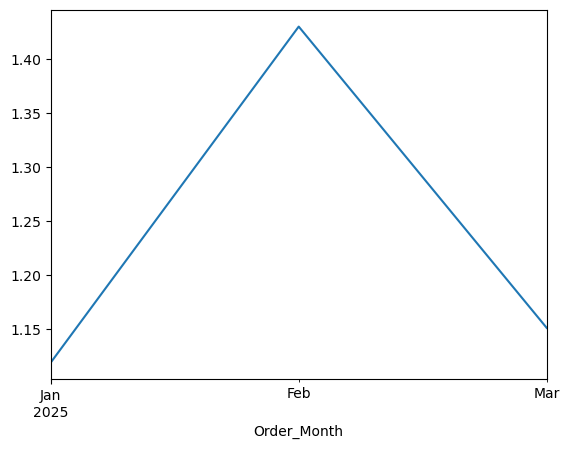

In [ ]:
# Determine the overall delay trend for the periods affected:
df['Order_Month'] = df['Order_Date'].dt.to_period('M')
df.groupby("Order_Month")["Product_Delay_Days"].mean().plot(kind='line');

In [ ]:
# Determine the average delivery across all regions:
avg_by_region = df.groupby(['Region', 'Order_Month'])['Delivery_Time'].mean().reset_index()
avg_by_region.sort_values(by="Delivery_Time", ascending=False)

,Region,Order_Month,Delivery_Time
0,East,2025-01,6.266667
8,South-West,2025-03,6.210526
4,North,2025-02,6.173913
2,East,2025-03,5.950000
6,South-West,2025-01,5.485714
10,West,2025-02,5.400000
11,West,2025-03,5.384615
1,East,2025-02,5.090909
7,South-West,2025-02,5.035714
3,North,2025-01,4.892857


In [ ]:
# Filter only East to determine the cause of slow delivery in Jan:
East_region_jan = df[(df['Region']== 'East') & (df['Order_Date'].dt.to_period('M') == '2025-01')]

East_region_jan["Delivery_Time"] = (East_region_jan["Delivery_Date"] - East_region_jan["Order_Date"]).dt.days
East_region_jan.describe()

,Order_Date,Promised_Delivery_Date,Delivery_Date,Customer_Complained,Product_Delay_Days,Delivery_Time
count,15,15,15,15.000000,15.000000,15.000000
mean,2025-01-13 01:36:00,2025-01-17 12:48:00,2025-01-19 08:00:00,0.266667,1.800000,6.266667
min,2025-01-01 00:00:00,2025-01-06 00:00:00,2025-01-05 00:00:00,0.000000,-2.000000,0.000000
25%,2025-01-04 12:00:00,2025-01-09 00:00:00,2025-01-10 12:00:00,0.000000,0.000000,5.000000
50%,2025-01-14 00:00:00,2025-01-18 00:00:00,2025-01-18 00:00:00,0.000000,1.000000,7.000000
75%,2025-01-20 12:00:00,2025-01-25 00:00:00,2025-01-27 00:00:00,0.500000,3.000000,7.500000
max,2025-01-27 00:00:00,2025-02-03 00:00:00,2025-02-04 00:00:00,1.000000,8.000000,11.000000
std,NaN,NaN,NaN,0.457738,2.833473,3.127451


In [ ]:
df.tail()

,Order_ID,Order_Date,Promised_Delivery_Date,Delivery_Date,Region,Product_Category,Courier,Customer_Complained,Product_Delay_Days,Late,Delivery_Time,Order_Month
295,ORD1295,2025-02-02,2025-02-09,2025-02-12,East,Home Goods,FastTrack,1,3,True,10,2025-02
296,ORD1296,2025-01-14,2025-01-19,2025-01-22,West,Home Goods,QuickMove,1,3,True,8,2025-01
297,ORD1297,2025-01-21,2025-01-23,2025-01-25,North,Electronics,SpeedyShip,0,2,True,4,2025-01
298,ORD1298,2025-02-17,2025-02-20,2025-02-21,East,Home Goods,SpeedyShip,1,1,True,4,2025-02
299,ORD1299,2025-01-20,2025-01-25,2025-01-26,East,Toys,QuickMove,0,1,True,6,2025-01


In [ ]:
df['Late'] = (df['Delivery_Date'] > df['Promised_Delivery_Date']).astype(int)
df.head()

,Order_ID,Order_Date,Promised_Delivery_Date,Delivery_Date,Region,Product_Category,Courier,Customer_Complained,Product_Delay_Days,Late,Delivery_Time,Order_Month
0,ORD1000,2025-02-21,2025-02-24,2025-02-26,West,Clothing,QuickMove,0,2,1,5,2025-02
1,ORD1001,2025-01-15,2025-01-20,2025-01-20,West,Electronics,FastTrack,0,0,0,5,2025-01
2,ORD1002,2025-03-13,2025-03-18,2025-03-23,West,Clothing,QuickMove,1,5,1,10,2025-03
3,ORD1003,2025-03-02,2025-03-05,2025-03-04,North,Clothing,FastTrack,0,-1,0,2,2025-03
4,ORD1004,2025-01-21,2025-01-26,2025-01-30,South-West,Toys,SpeedyShip,0,4,1,9,2025-01


In [ ]:
print(East_region_jan.shape)
print(East_region_jan.head())

(15, 12)
    Order_ID Order_Date Promised_Delivery_Date Delivery_Date Region  \
12   ORD1012 2025-01-22             2025-01-25    2025-01-30   East   
43   ORD1043 2025-01-21             2025-01-26    2025-01-28   East   
59   ORD1059 2025-01-08             2025-01-10    2025-01-09   East   
70   ORD1070 2025-01-04             2025-01-11    2025-01-11   East   
114  ORD1114 2025-01-05             2025-01-07    2025-01-05   East   

    Product_Category     Courier  Customer_Complained  Product_Delay_Days  \
12              Toys   QuickMove                    1                   5   
43        Home Goods   QuickMove                    1                   2   
59              Toys   QuickMove                    0                  -1   
70        Home Goods   QuickMove                    0                   0   
114         Clothing  SpeedyShip                    0                  -2   

      Late  Delivery_Time Order_Month  
12    True              8     2025-01  
43    True           

In [ ]:
# Determine the percentage average of late delivered goods across all regions
late_delivery =df['Late'].mean() * 100
print(f"percentage of late deliveries:{late_delivery:.2f}%")

percentage of late deliveries:56.00%


In [ ]:
East_region_jan = df[(df['Region']== 'East') & (df['Order_Date'] == '2025-01')]

In [ ]:
# The courier that caused the most delay in month of Jan:
East_region_jan.groupby("Courier")["Delivery_Time"].mean()

Courier
QuickMove    11.0
Name: Delivery_Time, dtype: float64

In [ ]:
# Product delayed
East_region_jan["Product_Category"].value_counts()

Product_Category
Home Goods    1
Name: count, dtype: int64

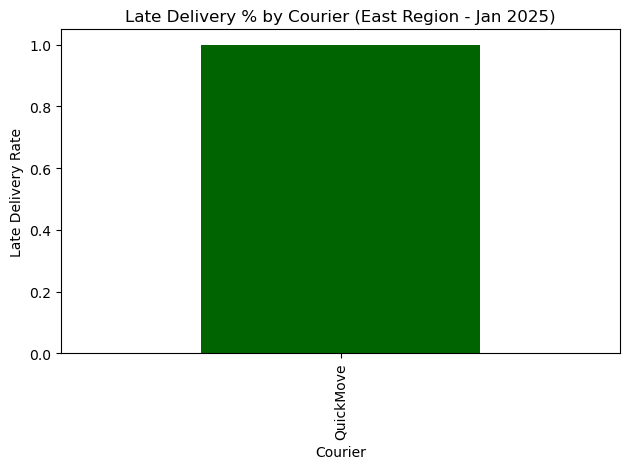

In [ ]:
East_region_jan.groupby("Courier")["Late"].mean().plot(
    kind='bar',
    title='Late Delivery % by Courier (East Region - Jan 2025)',
    ylabel='Late Delivery Rate',
    xlabel='Courier',
    color='darkgreen'
)
plt.tight_layout()
plt.show()

In [ ]:
# Filter only North to determine the cause of slow delivery in Feb:
North_region_feb = df[(df['Region']== 'North') & (df['Order_Date'].dt.to_period('M') == '2025-02')]

North_region_feb["Delivery_Time"] = (North_region_feb["Delivery_Date"] - North_region_feb["Order_Date"]).dt.days
North_region_feb.describe()

,Order_Date,Promised_Delivery_Date,Delivery_Date,Customer_Complained,Product_Delay_Days,Late,Delivery_Time
count,23,23,23,23.000000,23.000000,23.000000,23.000000
mean,2025-02-16 06:15:39.130434816,2025-02-20 09:23:28.695652096,2025-02-22 10:26:05.217391360,0.304348,2.043478,0.695652,6.173913
min,2025-02-02 00:00:00,2025-02-07 00:00:00,2025-02-04 00:00:00,0.000000,-3.000000,0.000000,0.000000
25%,2025-02-09 00:00:00,2025-02-11 12:00:00,2025-02-13 12:00:00,0.000000,0.000000,0.000000,4.000000
50%,2025-02-17 00:00:00,2025-02-22 00:00:00,2025-02-22 00:00:00,0.000000,2.000000,1.000000,6.000000
75%,2025-02-23 12:00:00,2025-02-28 12:00:00,2025-03-02 00:00:00,1.000000,4.500000,1.000000,8.000000
max,2025-02-28 00:00:00,2025-03-05 00:00:00,2025-03-11 00:00:00,1.000000,7.000000,1.000000,14.000000
std,NaN,NaN,NaN,0.470472,3.111244,0.470472,3.537490


In [ ]:
print(North_region_feb.shape)
print(North_region_feb.head())

(23, 12)
   Order_ID Order_Date Promised_Delivery_Date Delivery_Date Region  \
28  ORD1028 2025-02-28             2025-03-03    2025-03-08  North   
38  ORD1038 2025-02-24             2025-02-27    2025-02-28  North   
41  ORD1041 2025-02-20             2025-02-22    2025-02-28  North   
53  ORD1053 2025-02-22             2025-02-25    2025-02-22  North   
69  ORD1069 2025-02-23             2025-02-25    2025-03-01  North   

   Product_Category     Courier  Customer_Complained  Product_Delay_Days  \
28       Home Goods   QuickMove                    0                   5   
38       Home Goods   QuickMove                    1                   1   
41       Home Goods   QuickMove                    0                   6   
53         Clothing  SpeedyShip                    0                  -3   
69         Clothing  SpeedyShip                    1                   4   

    Late  Delivery_Time Order_Month  
28     1              8     2025-02  
38     1              4     2025-02  

In [ ]:
North_region_feb.groupby("Courier")["Delivery_Time"].mean()

Courier
FastTrack     6.2
QuickMove     6.0
SpeedyShip    6.6
Name: Delivery_Time, dtype: float64

In [ ]:
North_region_feb["Product_Category"].value_counts()

Product_Category
Clothing       9
Electronics    6
Home Goods     5
Toys           3
Name: count, dtype: int64

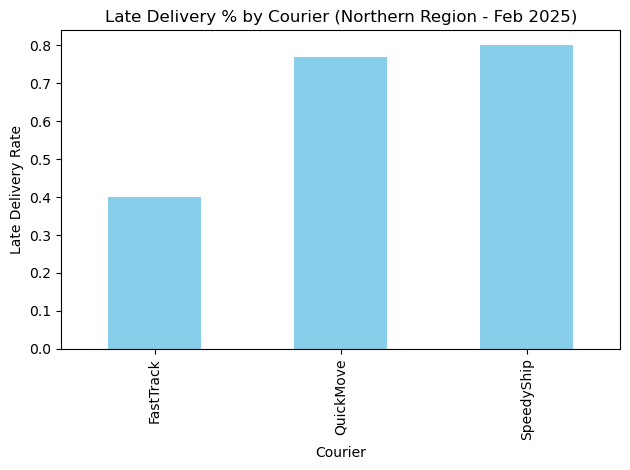

In [ ]:
North_region_feb.groupby("Courier")["Late"].mean().plot(
    kind='bar',
    title='Late Delivery % by Courier (Northern Region - Feb 2025)',
    ylabel='Late Delivery Rate',
    xlabel='Courier',
    color='skyblue'
)
plt.tight_layout()
plt.show()

In [ ]:
Southwest_region_Mar = df[(df['Region'] == 'South-West') &(df['Order_Date'].dt.month == 3)]

In [ ]:
Southwest_region_Mar = df[(df['Region']== 'South-West') & (df['Order_Date'].dt.to_period('M') == '2025-03')]

Southwest_region_Mar["Delivery_Time"] = (Southwest_region_Mar["Delivery_Date"] - Southwest_region_Mar["Order_Date"]).dt.days
Southwest_region_Mar.describe()

,Order_Date,Promised_Delivery_Date,Delivery_Date,Customer_Complained,Product_Delay_Days,Late,Delivery_Time
count,38,38,38,38.000000,38.000000,38.000000,38.000000
mean,2025-03-16 23:22:06.315789568,2025-03-21 20:50:31.578947328,2025-03-23 04:25:15.789473792,0.342105,1.315789,0.578947,6.210526
min,2025-03-01 00:00:00,2025-03-03 00:00:00,2025-03-05 00:00:00,0.000000,-5.000000,0.000000,0.000000
25%,2025-03-10 06:00:00,2025-03-14 12:00:00,2025-03-15 12:00:00,0.000000,0.000000,0.000000,3.000000
50%,2025-03-18 12:00:00,2025-03-23 00:00:00,2025-03-21 12:00:00,0.000000,1.000000,1.000000,6.500000
75%,2025-03-25 00:00:00,2025-03-29 00:00:00,2025-03-31 12:00:00,1.000000,3.000000,1.000000,9.000000
max,2025-03-31 00:00:00,2025-04-07 00:00:00,2025-04-09 00:00:00,1.000000,8.000000,1.000000,15.000000
std,NaN,NaN,NaN,0.480783,3.297052,0.500355,3.473124


In [ ]:
print(Southwest_region_Mar.shape)
print(Southwest_region_Mar.head())

(38, 12)
   Order_ID Order_Date Promised_Delivery_Date Delivery_Date      Region  \
5   ORD1005 2025-03-24             2025-03-29    2025-03-29  South-West   
23  ORD1023 2025-03-17             2025-03-20    2025-03-20  South-West   
31  ORD1031 2025-03-21             2025-03-28    2025-03-30  South-West   
33  ORD1033 2025-03-03             2025-03-06    2025-03-09  South-West   
34  ORD1034 2025-03-03             2025-03-05    2025-03-06  South-West   

   Product_Category     Courier  Customer_Complained  Product_Delay_Days  \
5        Home Goods  SpeedyShip                    0                   0   
23         Clothing   QuickMove                    0                   0   
31         Clothing   QuickMove                    0                   2   
33         Clothing   QuickMove                    1                   3   
34         Clothing   QuickMove                    0                   1   

    Late  Delivery_Time Order_Month  
5      0              5     2025-03  
23     

In [ ]:
Southwest_region_Mar.groupby("Courier")["Delivery_Time"].mean()

Courier
FastTrack     6.333333
QuickMove     5.900000
SpeedyShip    6.666667
Name: Delivery_Time, dtype: float64

In [ ]:
Southwest_region_Mar["Product_Category"].value_counts()

Product_Category
Toys           13
Clothing       11
Home Goods      8
Electronics     6
Name: count, dtype: int64

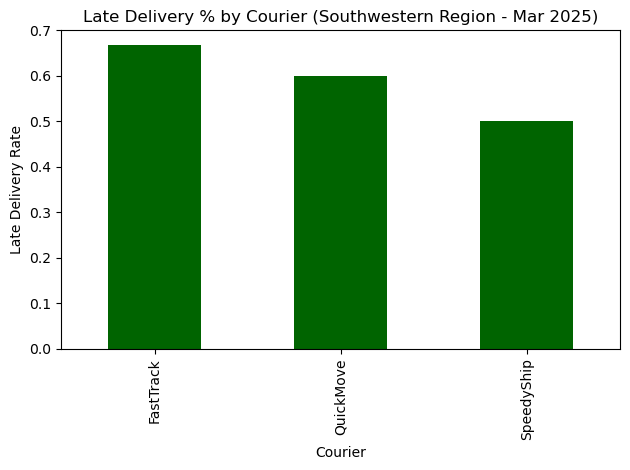

In [ ]:
Southwest_region_Mar.groupby("Courier")["Late"].mean().plot(
    kind='bar',
    title='Late Delivery % by Courier (Southwestern Region - Mar 2025)',
    ylabel='Late Delivery Rate',
    xlabel='Courier',
    color='darkgreen'
)
plt.tight_layout()
plt.show()

In [ ]:
df_summary =df.groupby(['Courier', 'Order_Month']).agg({
    'Order_ID': 'count',
    'Late': 'mean'
}).rename(columns={'Order_ID': 'Total_Orders', 'Late': 'Delay_Rate'})

print(df_summary)

                        Total_Orders  Delay_Rate
Courier    Order_Month                          
FastTrack  2025-01                15    0.533333
           2025-02                16    0.500000
           2025-03                18    0.666667
QuickMove  2025-01                54    0.592593
           2025-02                38    0.631579
           2025-03                53    0.528302
SpeedyShip 2025-01                32    0.562500
           2025-02                39    0.512821
           2025-03                35    0.514286


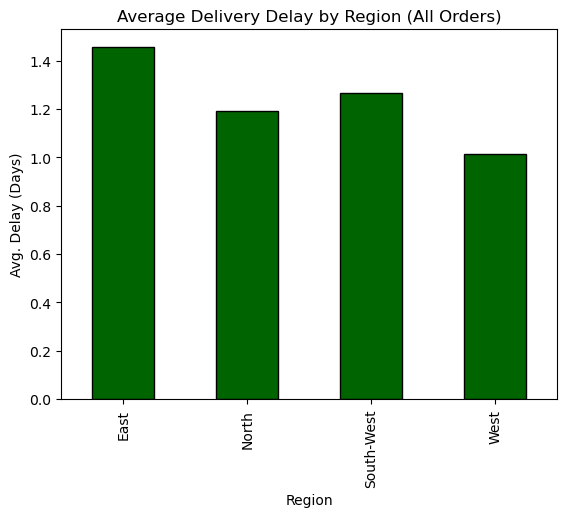

In [ ]:
# Determine average delay delivery across all regions and plot visualization:

avg_delay_by_region = df.groupby('Region')['Product_Delay_Days'].mean()

avg_delay_by_region.plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title('Average Delivery Delay by Region (All Orders)')
plt.xlabel('Region')
plt.ylabel('Avg. Delay (Days)')
plt.show()

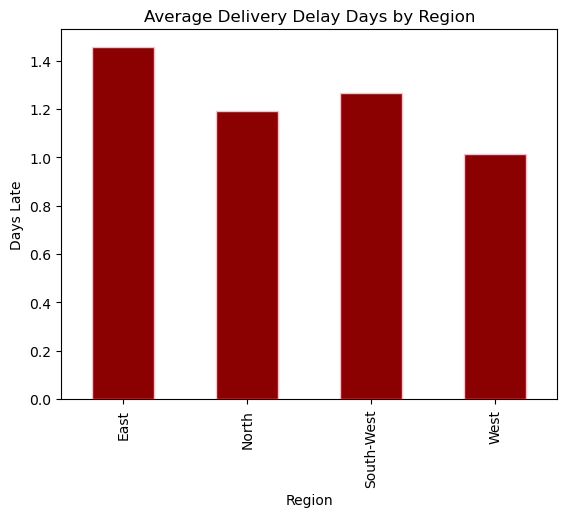

In [ ]:
# Calculate the number of days delayed
df['Delivery_Delay'] = (df['Delivery_Date'] - df['Promised_Delivery_Date']).dt.days

df.groupby('Region')['Product_Delay_Days'].mean().plot(kind='bar', color='darkred', edgecolor='pink')
plt.title('Average Delivery Delay Days by Region')
plt.ylabel('Days Late')
plt.show()

In [ ]:
df['Month_Year'] = df['Order_Date'].dt.to_period('M').astype(str)

In [ ]:
monthly_avg = df.groupby('Month_Year')['Delivery_Time'].mean().reset_index()

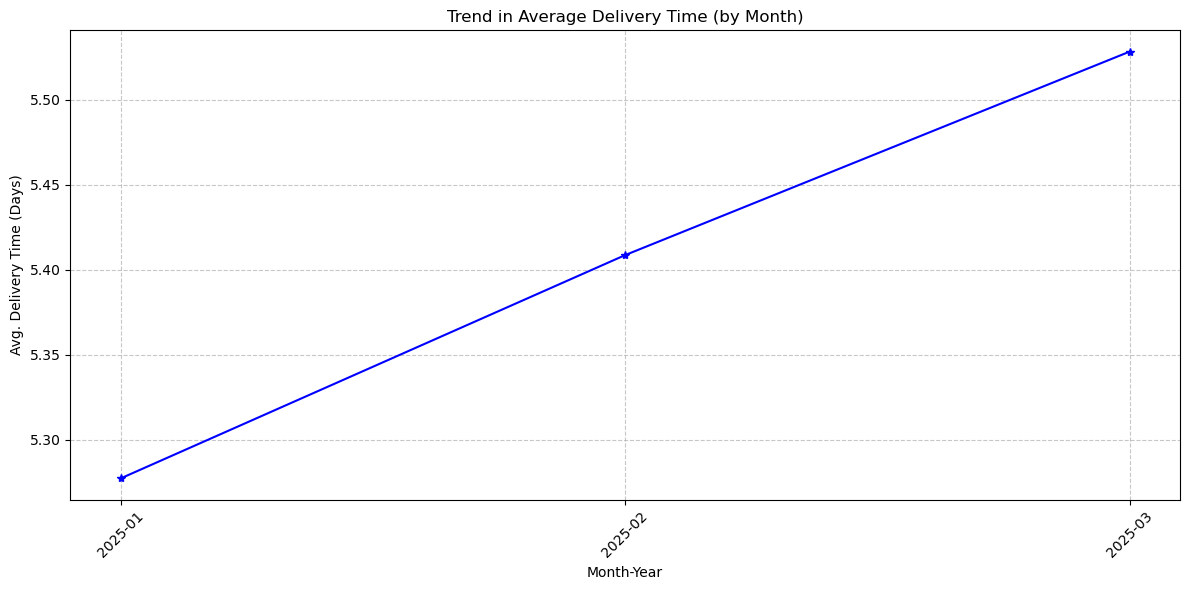

In [ ]:
# Calculate the overall average trend by month:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['Month_Year'], monthly_avg['Delivery_Time'], marker='*', color='blue', linestyle='-')
plt.title('Trend in Average Delivery Time (by Month)')
plt.xlabel('Month-Year')
plt.ylabel('Avg. Delivery Time (Days)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Aggregate Product category and delay days to determine the average of delay in all regions
avg_delay_by_product_category = df.groupby('Product_Category')['Product_Delay_Days'].mean().reset_index()

In [ ]:
heatmap_data = df.pivot_table(
    index='Product_Category',
    columns='Region',  # Optional: Replace with 'Courier' if needed
    values='Product_Delay_Days',
    aggfunc='mean')

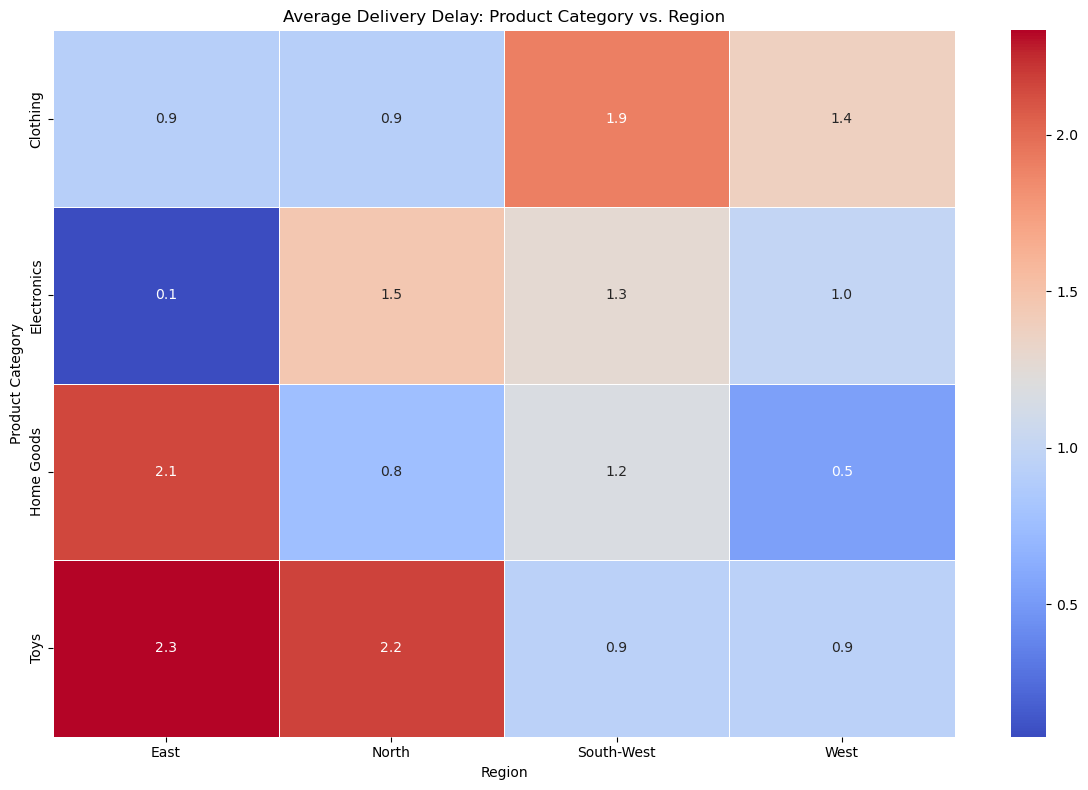

In [ ]:
# Plot a heatmap to show the average of product delay across all regions:
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Average Delivery Delay: Product Category vs. Region')
plt.xlabel('Region')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

In [ ]:
# Check if customer complaint has a connection with delivery means or distance:
df['Customer_Complained'] = df['Customer_Complained'].astype(int)
df.head()

,Order_ID,Order_Date,Promised_Delivery_Date,Delivery_Date,Region,Product_Category,Courier,Customer_Complained,Product_Delay_Days,Late,Delivery_Time,Order_Month,Delivery_Delay,Month_Year
0,ORD1000,2025-02-21,2025-02-24,2025-02-26,West,Clothing,QuickMove,0,2,1,5,2025-02,2,2025-02
1,ORD1001,2025-01-15,2025-01-20,2025-01-20,West,Electronics,FastTrack,0,0,0,5,2025-01,0,2025-01
2,ORD1002,2025-03-13,2025-03-18,2025-03-23,West,Clothing,QuickMove,1,5,1,10,2025-03,5,2025-03
3,ORD1003,2025-03-02,2025-03-05,2025-03-04,North,Clothing,FastTrack,0,-1,0,2,2025-03,-1,2025-03
4,ORD1004,2025-01-21,2025-01-26,2025-01-30,South-West,Toys,SpeedyShip,0,4,1,9,2025-01,4,2025-01


In [ ]:
corr_matrix = df[['Product_Delay_Days','Customer_Complained']].corr()
print(corr_matrix)

                     Product_Delay_Days  Customer_Complained
Product_Delay_Days             1.000000             0.462863
Customer_Complained            0.462863             1.000000


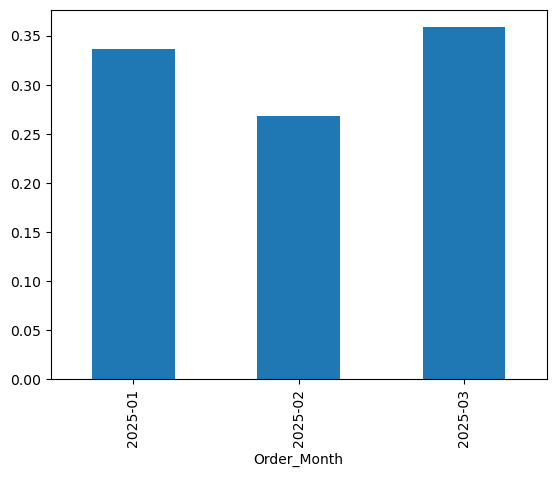

In [ ]:
df.groupby("Order_Month")["Customer_Complained"].mean().plot(kind='bar');

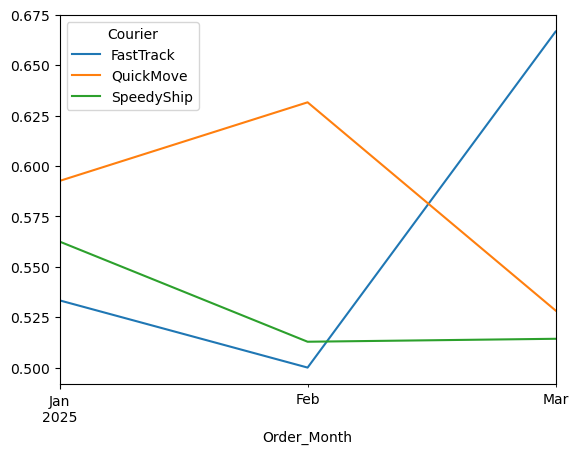

In [ ]:
# Determine the frequency of lateness by each shipping partner:
df.groupby(["Order_Month", "Courier"])["Late"].mean().unstack().plot();

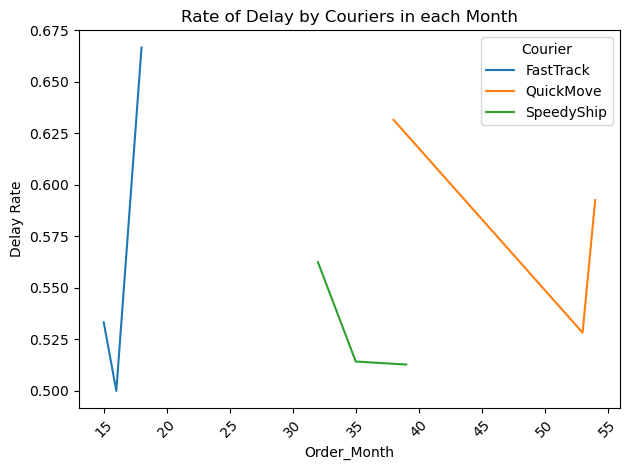

In [ ]:
# Plot average rate of total splitted by month and delay by couriers:
sns.lineplot(data=df_summary, x='Total_Orders', y='Delay_Rate', hue='Courier')
plt.title('Rate of Delay by Couriers in each Month')
plt.ylabel('Delay Rate')
plt.xlabel('Order_Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
monthly_summary = df.groupby('Order_Month').agg({
    'Order_ID': 'count',
    'Late': 'mean'
}).rename(columns={'Order_ID': 'Total_Orders', 'Late': 'Delay_Rate'})

print(monthly_summary)

             Total_Orders  Delay_Rate
Order_Month                          
2025-01               101    0.574257
2025-02                93    0.559140
2025-03               106    0.547170


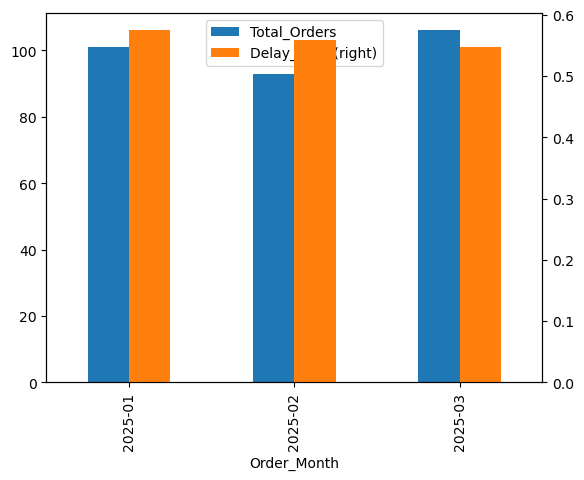

In [ ]:
monthly_summary.plot(kind='bar', secondary_y='Delay_Rate');

### **MONTH BY MONTH DELIVERY TREND INSIGHTS**
#### The first thing I did was to plot the overall delay delivery trend across the months of interest (January to March)
#### to uncover the pattern of delay.
#### The plot revealed an upward delay in January, a relatively enhanced scenario in February, and a sharp increase again in March.

#### To understand what informed these shifts, I carried out detailed analyses to uncover the causes of the delay in January,
#### the improvement in February, and what went wrong again in March.
#### **January – High Delay Scenario**

#### The Eastern region recorded the highest delay with an average delivery time of about 6.27 days.
#### A total of 101 orders were handled by almost a single courier – QuickMove.
#### Four product categories were shipped to the Eastern region in Jan.

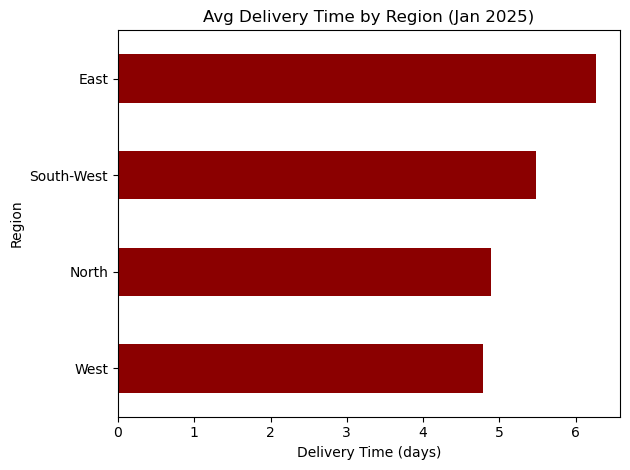

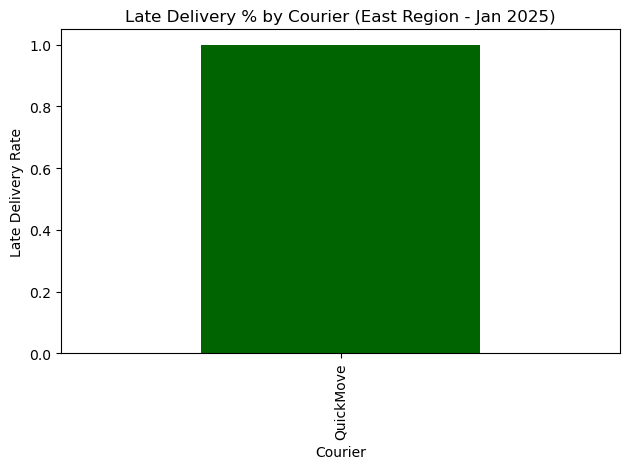

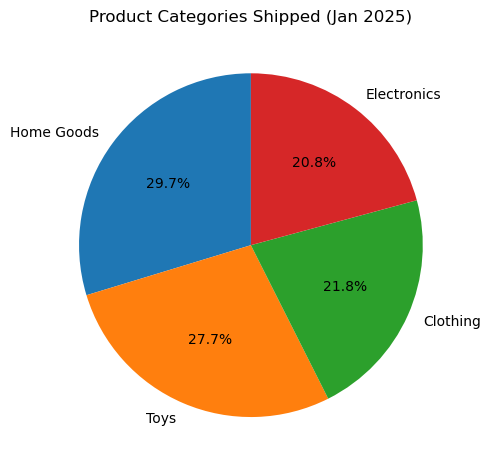

Summary Metrics for Jan 2025:
Total Orders: 101
Average Delivery Time: 5.28 days
Customer Complaint Rate: 33.66%


In [ ]:
jan_df = df[df['Order_Month'] == '2025-01']

avg_delivery_time_region = jan_df.groupby('Region')['Delivery_Time'].mean().sort_values()
avg_delivery_time_region.plot(kind='barh', color='darkred')
plt.title('Avg Delivery Time by Region (Jan 2025)')
plt.xlabel('Delivery Time (days)')
plt.tight_layout()
plt.show()




East_region_jan.groupby("Courier")["Late"].mean().plot(
    kind='bar',
    title='Late Delivery % by Courier (East Region - Jan 2025)',
    ylabel='Late Delivery Rate',
    xlabel='Courier',
    color='darkgreen'
)
plt.tight_layout()
plt.show()



category_counts = jan_df["Product_Category"].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("tab10"))
plt.title('Product Categories Shipped (Jan 2025)')
plt.ylabel('')
plt.tight_layout()
plt.show()

print("Summary Metrics for Jan 2025:")
print(f"Total Orders: {jan_df.shape[0]}")
print(f"Average Delivery Time: {jan_df['Delivery_Time'].mean():.2f} days")
print(f"Customer Complaint Rate: {jan_df['Customer_Complained'].mean():.2%}")

### **Feburay-Enhanced Delivery Scenario**
#### Similar analysis was followed to determine the metrics used to enhance delivery in Feb and minimize customer complaint:
#### Unlike Jan, there was a total of 93 Orders on average delivery time of 6.17,
#### three different shipping companies were used and total four different products categories were shipped to the North in Feb.
#### So Feb had relatively same number of goods delivered but additional two more shipping companies which made the delivery less cumbersome
#### and reinforced customer confidence, with minimal customer complaint.

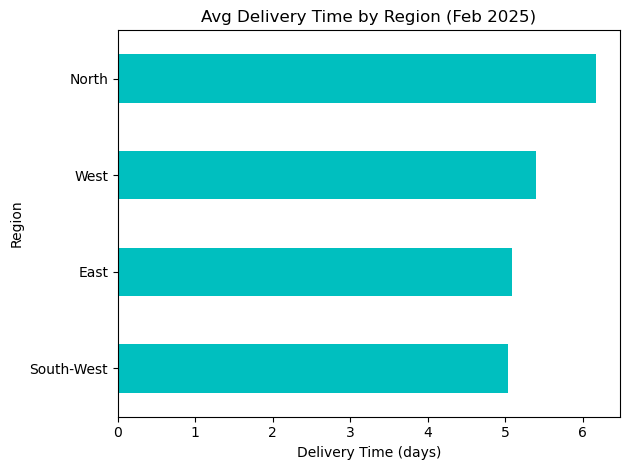

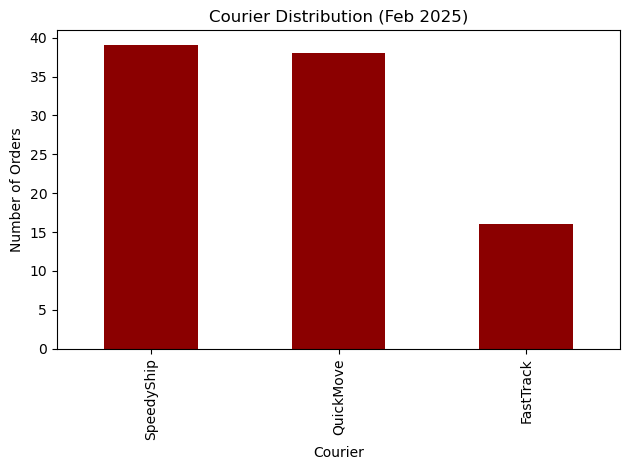

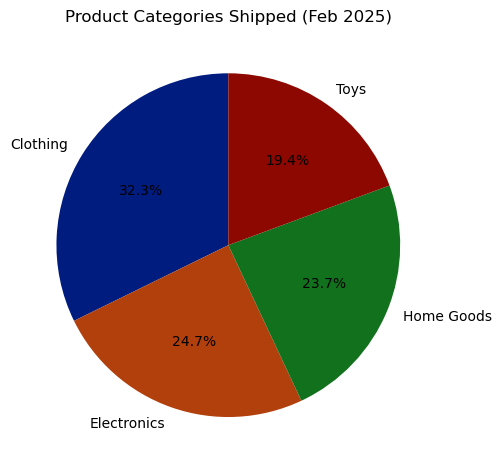

Summary Metrics for Feb 2025:
Total Orders: 93
Unique Couriers Used: 3
Product Categories: 4
Average Delivery Time: 5.41 days
Customer Complaint Rate: 26.88%


In [ ]:
feb_df = df[df['Order_Month'] == '2025-02']

avg_delivery_time_region = feb_df.groupby('Region')['Delivery_Time'].mean().sort_values()
avg_delivery_time_region.plot(kind='barh', color='c')
plt.title('Avg Delivery Time by Region (Feb 2025)')
plt.xlabel('Delivery Time (days)')
plt.tight_layout()
plt.show()

courier_orders = feb_df['Courier'].value_counts()
courier_orders.plot(kind='bar', color='darkred')
plt.title('Courier Distribution (Feb 2025)')
plt.ylabel('Number of Orders')
plt.xlabel('Courier')
plt.tight_layout()
plt.show()

category_counts = feb_df['Product_Category'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("dark"))
plt.title('Product Categories Shipped (Feb 2025)')
plt.ylabel('')
plt.tight_layout()
plt.show()

print("Summary Metrics for Feb 2025:")
print(f"Total Orders: {feb_df.shape[0]}")
print(f"Unique Couriers Used: {feb_df['Courier'].nunique()}")
print(f"Product Categories: {feb_df['Product_Category'].nunique()}")
print(f"Average Delivery Time: {feb_df['Delivery_Time'].mean():.2f} days")
print(f"Customer Complaint Rate: {feb_df['Customer_Complained'].mean():.2%}")

### **March - More Delay Highier than Jan Scenario**
#### March saw a surge in number of orders with a total of 106 orders from Southwest region.
#### The record of delay increased with average delivery delay of 6.21.  
####  Reasons are more orders and and inconsistency of some of the couriers, say, FastTrack and SpeedyShip.
#### While SpeedySip has much orders, it outperformed FastTrack in meeting up with the delivery promised, however, it was slow compared to QuickMove.

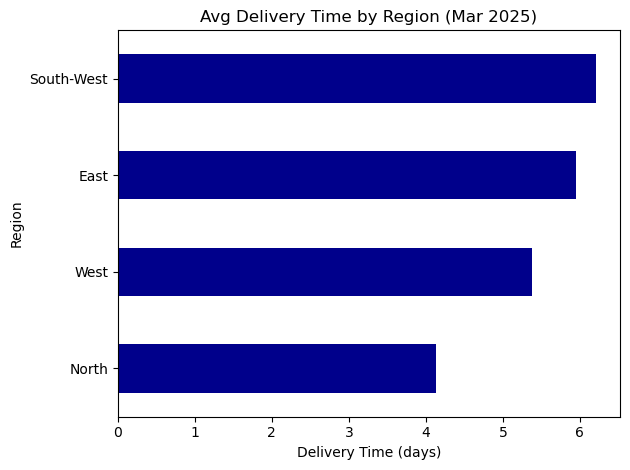

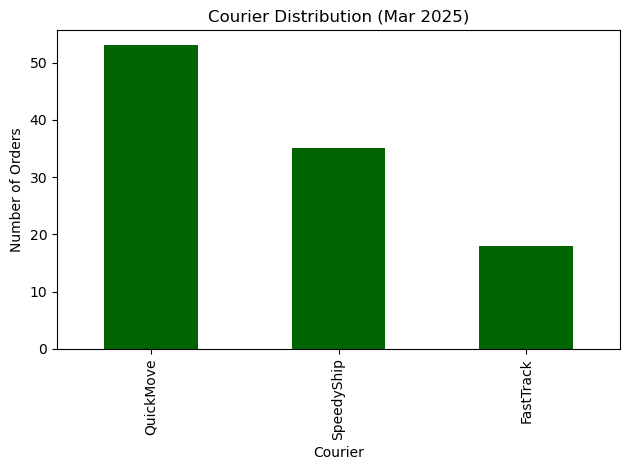

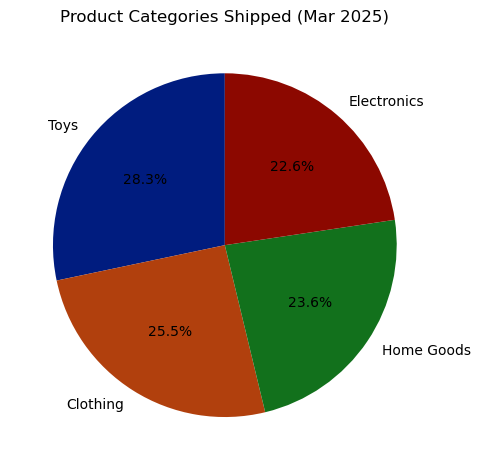

Summary Metrics for MAR 2025:
Total Orders: 106
Unique Couriers Used: 3
Product Categories: 4
Average Delivery Time: 5.53 days
Customer Complaint Rate: 35.85%


In [ ]:
mar_df = df[df['Order_Month'] == '2025-03']

avg_delivery_time_region = mar_df.groupby('Region')['Delivery_Time'].mean().sort_values()
avg_delivery_time_region.plot(kind='barh', color='darkblue')
plt.title('Avg Delivery Time by Region (Mar 2025)')
plt.xlabel('Delivery Time (days)')
plt.tight_layout()
plt.show()

courier_orders = mar_df['Courier'].value_counts()
courier_orders.plot(kind='bar', color='darkgreen')
plt.title('Courier Distribution (Mar 2025)')
plt.ylabel('Number of Orders')
plt.xlabel('Courier')
plt.tight_layout()
plt.show()

category_counts = mar_df['Product_Category'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("dark"))
plt.title('Product Categories Shipped (Mar 2025)')
plt.ylabel('')
plt.tight_layout()
plt.show()

print("Summary Metrics for MAR 2025:")
print(f"Total Orders: {mar_df.shape[0]}")
print(f"Unique Couriers Used: {mar_df['Courier'].nunique()}")
print(f"Product Categories: {mar_df['Product_Category'].nunique()}")
print(f"Average Delivery Time: {mar_df['Delivery_Time'].mean():.2f} days")
print(f"Customer Complaint Rate: {mar_df['Customer_Complained'].mean():.2%}")

### **Summary of Insight and Steps to Tackle the Delivery Delay Problem**

#### High delay rates are linked to single-courier reliance and poor load distribution.
#### Performance improves when there is a mix of couriers and balance load distribution.
#### Courier performance varies by region and month, so it's crucial to keep track of delay rates per courier per region.

#### **RECOMMENDATION:**
#### 1 Avoid Overreliance on a Single Courier:
####  Assign deliveries based on regional capacity, past performance, and current load.

#### 2 Dynamic Courier Assignment:
####   Implement load-balancing algorithms to distribute deliveries more efficiently.

#### 3 Forecast Demand Surges:
####  Anticipate order increases (like in March) and pre-engage additional courier partners.
#### Again, flag delay-prone number of orders in the customer’s cart.

#### 4 Courier Performance Monitoring:
####  Launch a dashboard to track KPIs like on-time delivery rate, complaints, and average delivery time per courier per region.

#### 5 Customer Feedback Integration:
#### Improve post-delivery feedback collection by actively linking delay data with customer complaints to identify patterns
#### and automate alerts for corrective action.